## 精准率-召回率 曲线

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
y[y!=9] = 0
y[y==9] = 1

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/richard/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [7]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [8]:
import matplotlib.pyplot as plt

### sklearn 中的 ROC 曲线

In [14]:
from sklearn.metrics import roc_curve
fprs, trps, thresholds = roc_curve(y_test, decision_scores)

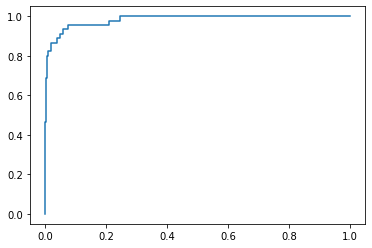

In [15]:
plt.plot(fprs, trps)
plt.show()

In [16]:
# 曲线下的面积(ROC)越大，说明模型越优秀, sklearn 中有现成的方法

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

In [ ]:
# ROC 对有偏数据并不敏感